In [1]:
from pathlib import Path
import scipy.io
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
# from train_ecg_fm import ECGDataset



In [4]:
import pandas as pd

class ECGDataset:
    def __init__(self, split, base_path='/mnt/sds/sd20i001/malte/data/physionet.org/files/mimic-iv-ecg-preprocessed/'): # '/mnt/sds/sd20i001/malte/data/physionet.org/files/mimic-iv-ecg-diagnostic-electrocardiogram-matched-subset/1.0/files'):
        self.split = split
        self.base_path = Path(base_path)
        path = f'/mnt/hdd/data/MMMedViT_data/data//{split}_meta_info.csv'
        # _study_ids = [p.stem for p in self.base_path.glob('*.mat')]
        df = pd.read_csv(path, index_col=0)
        df = df.dropna(subset=['last_ecg_id'])
        df['last_ecg_id'] = df['last_ecg_id'].astype(int).astype(str, copy=False)
        idxs = [(self.base_path / f'{x}.mat').exists() for x in df.last_ecg_id]
        self.df = df[idxs] # df.last_ecg_id.isin(_study_ids)]
        
    def __getitem__(self, i):
        sample = self.df.iloc[i]
        study_id = sample.last_ecg_id
        ecg_data = scipy.io.loadmat(self.base_path / f'{study_id}.mat')
        ecg = ecg_data['feats']
        text = ecg_data['text']
        return ecg, sample.y_true

    def __len__(self):
        return len(self.df)

  0%|          | 0/2661 [00:00<?, ?it/s]

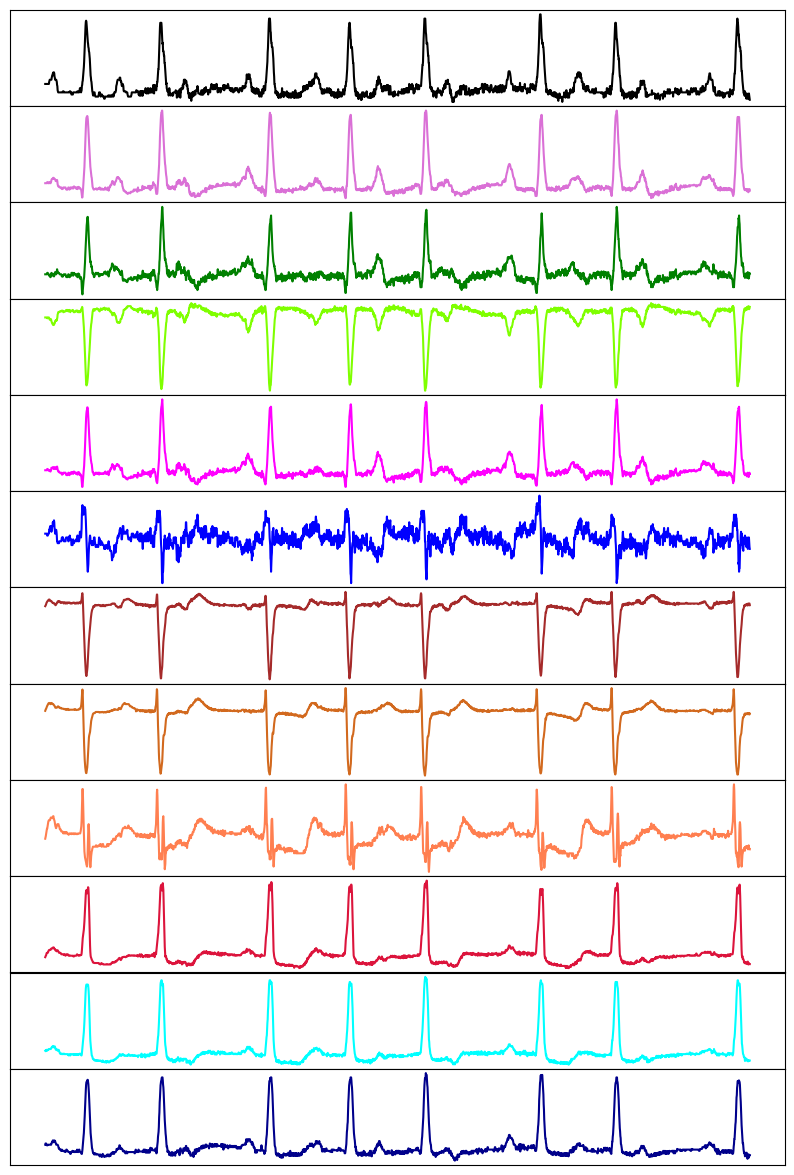

In [ ]:
colors = [
    "black", "orchid", "green", "chartreuse", "fuchsia", "blue", "brown", 
    "chocolate", "coral", "crimson", "cyan", "darkblue"
]
split = 'train'
ds = ECGDataset(split=split)
ecg_dst = Path('data/ecgs2') / split
for i, (ecg, _) in enumerate(tqdm(ds)):
    stay_id = ds.df.iloc[i].stay_id
    fig,axs = plt.subplots(12,1,figsize=(10,15))
    for i,ax in enumerate(axs):
        ax.plot(ecg[i][:2500], color=colors[i])
        # ax.set_axis_off()
        ax.set_xticks([])
        ax.set_yticks([])
    fig.subplots_adjust(hspace=0.,wspace=0.)
    # fig.savefig(ecg_dst / f'{stay_id}.png', bbox_inches='tight', dpi=72)
    # plt.close(fig)
    break
# fig.tight_layout()

In [20]:
# ds.df[ds.df.stay_id==30007565]
# ecg, _ = ds[3]
# fig.savefig('images/ecg30007565.pdf',bbox_inches='tight')

(849, 575, 3)


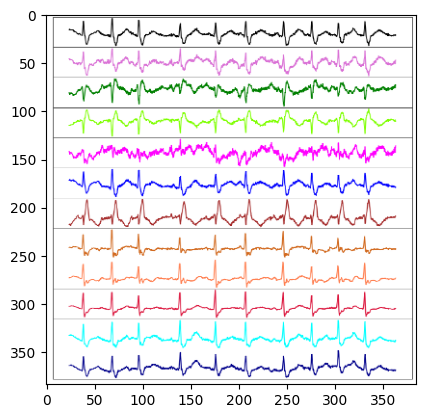

In [13]:
from PIL import Image
import numpy as np
import cv2

img = Image.open('example_ecg.png').convert('RGB')
img = np.array(img)
print(img.shape)
plt.imshow(cv2.resize(img, (384,384)))